# House price analysis - version 3 (use XGBoost)
My notebook for [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels?userId=1075113) competition

## Credit: Many thanks to:
- Pedro Marcelino [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)

- Sergei Neviadomski [How to get to TOP 25% with Simple Model (sklearn)](https://www.kaggle.com/neviadomski/how-to-get-to-top-25-with-simple-model-sklearn)

- juliencsA [study on Regression applied to the Ames dataset](https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset)
- BradenFitz-Gerald [RandomForestRegressor](https://www.kaggle.com/dfitzgerald3/randomforestregressor)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve, validation_curve
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from math import sqrt
from scipy import stats
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the DATA_DIR directory.
DATA_DIR="data-temp"
# Any results you write to the current directory are saved as output.

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.4/dist-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Data preprocessing

In [2]:
# Load data. Download from:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
train_data = pd.read_csv(DATA_DIR + "/train.csv")
eval_data =  pd.read_csv(DATA_DIR + "/test.csv")

In [254]:
# exploring train data
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [255]:
train_data_columns = train_data.columns.values
print(train_data_columns)
print('Train data columns:', len(train_data_columns))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [3]:
# Exploring eval data
eval_data_columns = eval_data.columns.values
print(eval_data_columns)
print('Evaluation data columns:',len(eval_data_columns))

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [257]:
print("Train data size:",len(train_data))
print("Test data size:", len(eval_data))

Train data size: 1460
Test data size: 1459


### Compare train's columns and eval columns to extract missing columns

In [258]:
print("Missing columns in test_data:", np.setdiff1d(train_data_columns, eval_data_columns))

Missing columns in test_data: ['SalePrice']


### Use all eval's columns as initial features set

In [4]:
# Initial features
o_features = eval_data_columns

# Store eval_id
eval_data_id = eval_data['Id']

### Combine train + eval data inorder to clean data & prepare feature

In [5]:
#Seperate input and label from train_data
input_data = train_data[o_features]
#input_data.head(5)

In [6]:
#Combine train + eval data
combine_data = pd.concat([input_data, eval_data], keys=['train','eval'])
combine_data.head(5)
#input_data = combine_data.loc['train']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
train 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
      1   2          20       RL         80.0     9600   Pave   NaN      Reg   
      2   3          60       RL         68.0    11250   Pave   NaN      IR1   
      3   4          70       RL         60.0     9550   Pave   NaN      IR1   
      4   5          60       RL         84.0    14260   Pave   NaN      IR1   

        LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  \
train 0         Lvl    AllPub      ...                 0        0    NaN   
      1         Lvl    AllPub      ...                 0        0    NaN   
      2         Lvl    AllPub      ...                 0        0    NaN   
      3         Lvl    AllPub      ...                 0        0    NaN   
      4         Lvl    AllPub      ...                 0        0    NaN   

        Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
train 0   NaN         NaN       0      2    2008        WD         Normal  
      1   NaN         NaN       0      5    2007        WD         Normal  
      2   NaN         NaN       0      9    2008        WD         Normal  
      3   NaN         NaN       0      2    2006        WD        Abnorml  
      4   NaN         NaN       0     12    2008        WD         Normal  

[5 rows x 80 columns]

### Check and drop top NaN columns

In [7]:
#Get high percent of NaN data
null_data = combine_data.isnull()
total = null_data.sum().sort_values(ascending=False)
percent = (null_data.sum()/null_data.count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
high_percent_miss_data = missing_data[missing_data['Percent']>0.2]
#print(missing_data.head(20))
print(high_percent_miss_data)

             Total   Percent
PoolQC        2909  0.996574
MiscFeature   2814  0.964029
Alley         2721  0.932169
Fence         2348  0.804385
FireplaceQu   1420  0.486468


In [9]:
#Drop high percent NaN columns
drop_columns = high_percent_miss_data.index.values
print(drop_columns)
combine_data.drop(drop_columns, axis=1, inplace=True)
print("Number of features:",len(combine_data.columns))

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu']


ValueError: labels ['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu'] not contained in axis

### FillNA for numeric columns

In [10]:
# Get data with column type is number
numeric_data = combine_data.select_dtypes(include=[np.number])
numeric_data.dtypes
#numeric_data.head(5)

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
dtype: object

In [11]:
#For each NaN, fill with mean of columns'value
null_data = numeric_data.isnull().sum().sort_values(ascending=False)
print("Before fillNaN")
print(null_data[null_data>0])
cols = numeric_data.columns.values
for col in cols:
    combine_data[col].fillna(combine_data[col].mean(), inplace=True)
numeric_features  = cols    
#null_data = numeric_data.isnull().sum().sort_values(ascending=False)
#print("After fillNaN")
#print(null_data[null_data>0])

Before fillNaN
LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
dtype: int64


### FillNaN for object columns

In [12]:
# Get data with column type is number
object_data = combine_data.select_dtypes(include=['object'])
object_data.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [13]:
#For each NaN, fill with mean of columns'value
null_data = object_data.isnull().sum().sort_values(ascending=False)
print("Before fillNaN")
print(null_data[null_data>0])
cols = object_data.columns.values
for col in cols:
    combine_data[col].fillna(combine_data[col].mode()[0], inplace=True)
#null_data = object_data.isnull().sum().sort_values(ascending=False)
#print("After fillNaN")
#print(null_data[null_data>0])
#print(object_data[:5])
object_features = cols

Before fillNaN
GarageCond      159
GarageQual      159
GarageFinish    159
GarageType      157
BsmtCond         82
BsmtExposure     82
BsmtQual         81
BsmtFinType2     80
BsmtFinType1     79
MasVnrType       24
MSZoning          4
Utilities         2
Functional        2
Electrical        1
KitchenQual       1
SaleType          1
Exterior2nd       1
Exterior1st       1
dtype: int64


In [14]:
null_data = combine_data.isnull().sum().sort_values(ascending=False)
print("After fillNaN")
print(null_data[null_data>0])

After fillNaN
Series([], dtype: int64)


### Standarlize object data with Label Encoder

In [15]:
object_data_standardlized  = combine_data[object_features].apply(LabelEncoder().fit_transform)
#object_data_standardlized = pd.get_dummies(combine_data[object_features])
object_data_standardlized[:5]

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
train 0         3       1         3            3          0          4   
      1         3       1         3            3          0          2   
      2         3       1         0            3          0          4   
      3         3       1         0            3          0          0   
      4         3       1         0            3          0          2   

         LandSlope  Neighborhood  Condition1  Condition2      ...        \
train 0          0             5           2           2      ...         
      1          0            24           1           2      ...         
      2          0             5           2           2      ...         
      3          0             6           2           2      ...         
      4          0            15           2           2      ...         

         Electrical  KitchenQual  Functional  GarageType  GarageFinish  \
train 0           4            2           6           1             1   
      1           4            3           6           1             1   
      2           4            2           6           1             1   
      3           4            2           6           5             2   
      4           4            2           6           1             1   

         GarageQual  GarageCond  PavedDrive  SaleType  SaleCondition  
train 0           4           4           2         8              4  
      1           4           4           2         8              4  
      2           4           4           2         8              4  
      3           4           4           2         8              0  
      4           4           4           2         8              4  

[5 rows x 38 columns]

### Update combine_data with standardlized data

In [16]:
combine_data.update(object_data_standardlized)
combine_data[:5]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
train 0   1          60        3         65.0     8450      1        3   
      1   2          20        3         80.0     9600      1        3   
      2   3          60        3         68.0    11250      1        0   
      3   4          70        3         60.0     9550      1        0   
      4   5          60        3         84.0    14260      1        0   

        LandContour Utilities LotConfig      ...       OpenPorchSF  \
train 0           3         0         4      ...                61   
      1           3         0         2      ...                 0   
      2           3         0         4      ...                42   
      3           3         0         0      ...                35   
      4           3         0         2      ...                84   

        EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold  YrSold  \
train 0             0         0           0        0       0       2    2008   
      1             0         0           0        0       0       5    2007   
      2             0         0           0        0       0       9    2008   
      3           272         0           0        0       0       2    2006   
      4             0         0           0        0       0      12    2008   

         SaleType  SaleCondition  
train 0         8              4  
      1         8              4  
      2         8              4  
      3         8              0  
      4         8              4  

[5 rows x 75 columns]

### Feature scaling

In [17]:
std_scale = combine_data.apply(StandardScaler().fit_transform)
combine_data.update(std_scale)
combine_data[:5]

Id  MSSubClass   MSZoning  LotFrontage   LotArea     Street  \
train 0 -1.731458    0.067331 -0.0421566    -0.202068 -0.217879  0.0642493   
      1 -1.730271   -0.873616 -0.0421566     0.501870 -0.072044  0.0642493   
      2 -1.729084    0.067331 -0.0421566    -0.061280  0.137197  0.0642493   
      3 -1.727897    0.302568 -0.0421566    -0.436714 -0.078385  0.0642493   
      4 -1.726711    0.067331 -0.0421566     0.689587  0.518903  0.0642493   

         LotShape LandContour  Utilities LotConfig      ...       OpenPorchSF  \
train 0  0.746669    0.316671 -0.0185122  0.588555      ...          0.200006   
      1  0.746669    0.316671 -0.0185122 -0.658174      ...         -0.702843   
      2  -1.38178    0.316671 -0.0185122  0.588555      ...         -0.081209   
      3  -1.38178    0.316671 -0.0185122   -1.9049      ...         -0.184815   
      4  -1.38178    0.316671 -0.0185122 -0.658174      ...          0.540424   

        EnclosedPorch 3SsnPorch ScreenPorch PoolArea   MiscVal    MoSold  \
train 0     -0.359601 -0.103331   -0.285935 -0.06315 -0.089592 -1.552184   
      1     -0.359601 -0.103331   -0.285935 -0.06315 -0.089592 -0.446925   
      2     -0.359601 -0.103331   -0.285935 -0.06315 -0.089592  1.026753   
      3      3.874967 -0.103331   -0.285935 -0.06315 -0.089592 -1.552184   
      4     -0.359601 -0.103331   -0.285935 -0.06315 -0.089592  2.132012   

           YrSold  SaleType  SaleCondition  
train 0  0.157646  0.319311       0.204967  
      1 -0.602962  0.319311       0.204967  
      2  0.157646  0.319311       0.204967  
      3 -1.363569  0.319311       -3.50541  
      4  0.157646  0.319311       0.204967  

[5 rows x 75 columns]

### Split train & eval data set

In [39]:
combine_data= combine_data.astype(float)
train_set = combine_data.loc['train'].drop('Id', axis=1)
eval_set = combine_data.loc['eval'].drop('Id', axis=1)
#train_set[:5]
eval_set[:5]
#print(train_set.dtypes)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.873616,-1.561354,0.501870,0.184371,0.064249,0.746669,0.316671,-0.018512,0.588555,-0.21626,...,-0.702843,-0.359601,-0.103331,1.850256,-0.06315,-0.089592,-0.078505,1.67886,0.319311,0.204967
1,-0.873616,-0.042157,0.548800,0.519791,0.064249,-1.381776,0.316671,-0.018512,-1.904903,-0.21626,...,-0.170014,-0.359601,-0.103331,-0.285935,-0.06315,21.944410,-0.078505,1.67886,0.319311,0.204967
2,0.067331,-0.042157,0.220295,0.464374,0.064249,-1.381776,0.316671,-0.018512,0.588555,-0.21626,...,-0.199616,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.183764,1.67886,0.319311,0.204967
3,0.067331,-0.042157,0.408012,-0.024109,0.064249,-1.381776,0.316671,-0.018512,0.588555,-0.21626,...,-0.170014,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.078505,1.67886,0.319311,0.204967
4,1.478753,-0.042157,-1.234510,-0.654748,0.064249,-1.381776,-2.523149,-0.018512,0.588555,-0.21626,...,0.510823,-0.359601,-0.103331,2.277494,-0.06315,-0.089592,-1.920603,1.67886,0.319311,0.204967


# Model building

### Transform Label to balance training data

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


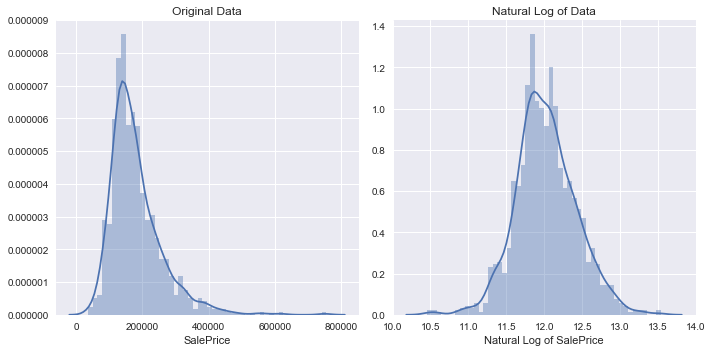

In [19]:
label = 'SalePrice'
target = train_data[label]
print(target[:5])
target_log = np.log(target)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(target, bins=50)
plt.title('Original Data')
plt.xlabel(label)

plt.subplot(1,2,2)
sns.distplot(target_log, bins=50)
plt.title('Natural Log of Data')
plt.xlabel('Natural Log of ' + label)
plt.tight_layout()


### Check correlation between SalePrice and other columns. Columns have strong relationship with Saleprice will have bigger corr value.

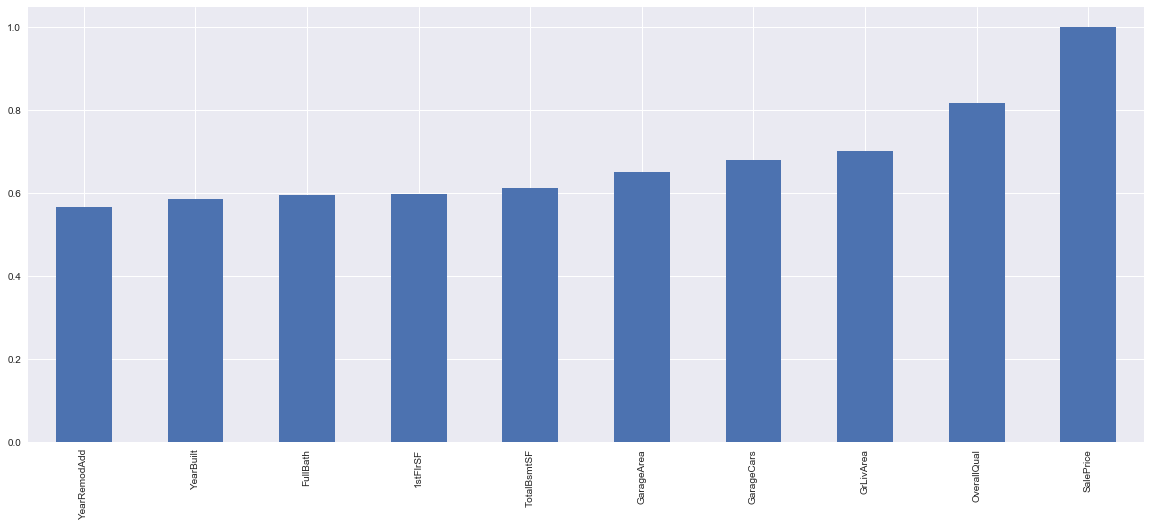

In [20]:
# Get top 10 most corr columns
combine_train_set = train_set.copy()
combine_train_set[label] = target_log
combine_train_set[:5]
correlation = combine_train_set.corr()[label].sort_values()[-10:]
correlation.plot.bar(figsize=(20,8), sort_columns = True)

### Use heatmap to check correlation

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'YearBuilt' 'YearRemodAdd']


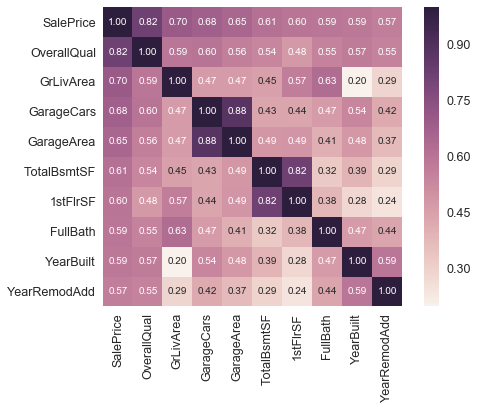

In [21]:
#saleprice correlation matrix
corrmat = combine_train_set.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols.values)
cm = np.corrcoef(combine_train_set[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Use pairplot to check correlation

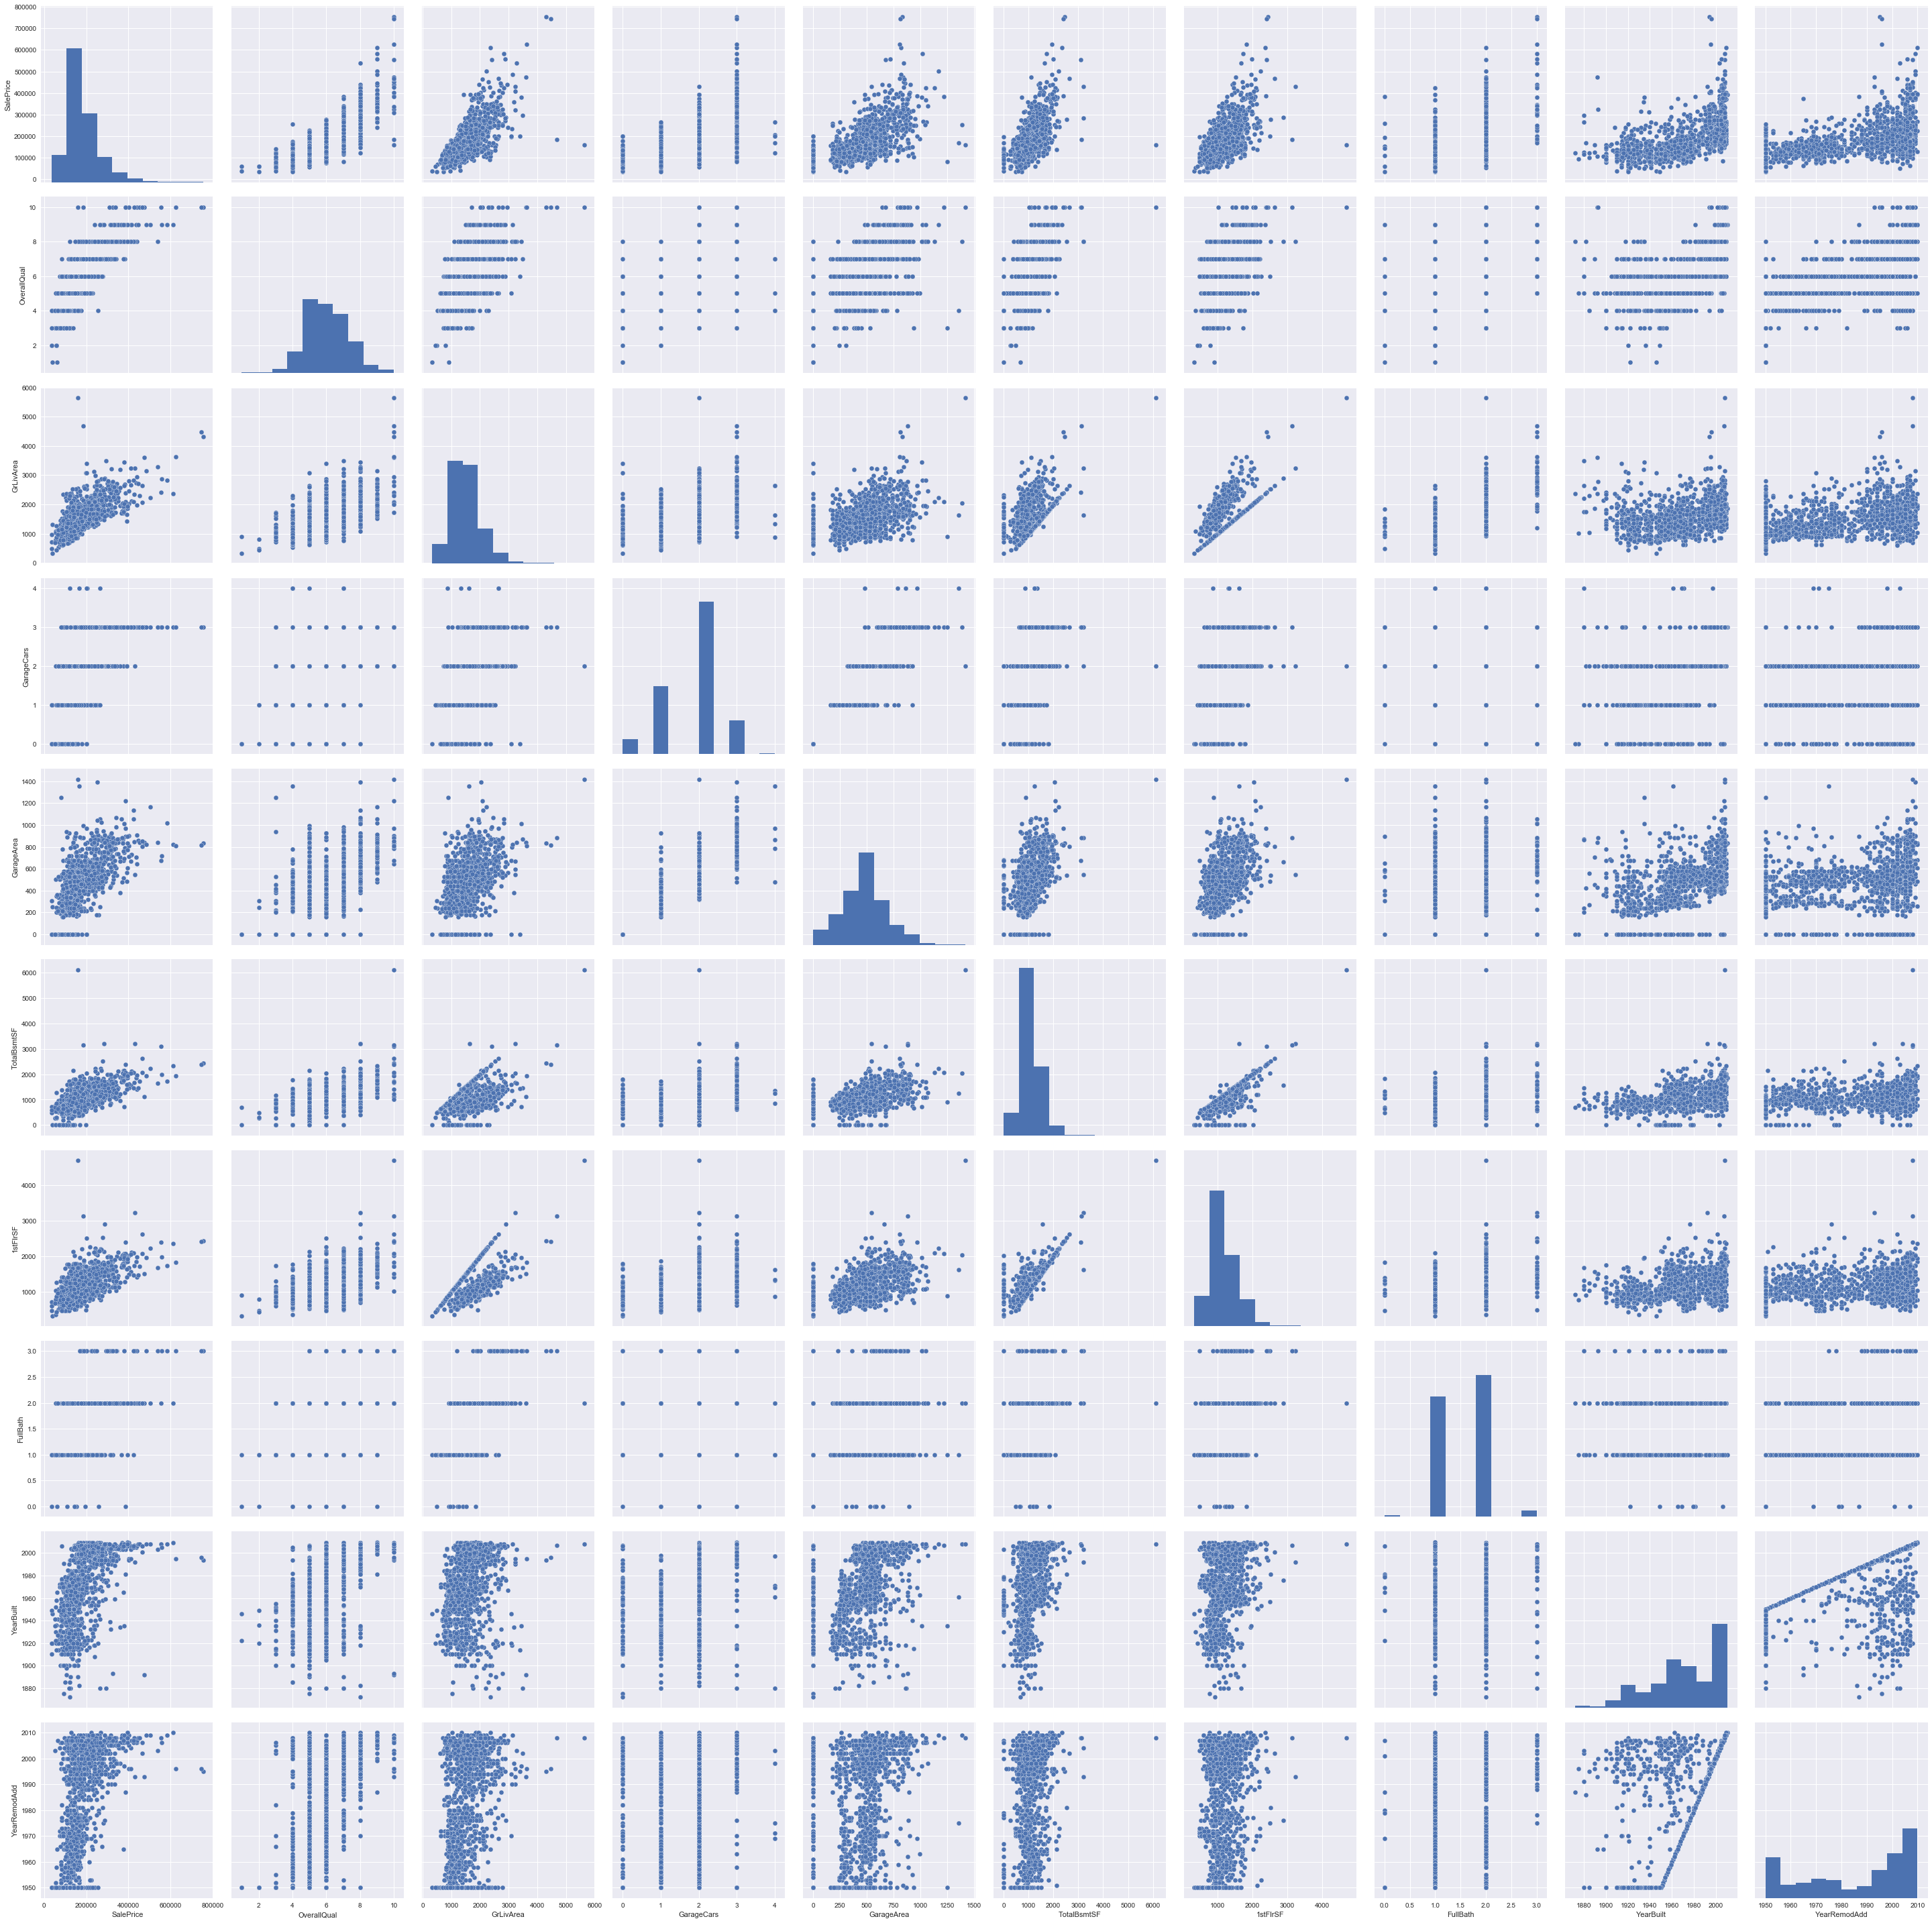

In [276]:
sns.set()
#cols = ['SalePrice', 'GrLivArea','GarageArea', 'TotalBsmtSF','1stFlrSF']
sns.pairplot(train_data[cols], size = 4)
plt.show();

### Use Learning curve to determine train/test split ratio

In [43]:
X = train_set
Y = target_log
X[:5]
#X.dtypes

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067331,-0.042157,-0.202068,-0.217879,0.064249,0.746669,0.316671,-0.018512,0.588555,-0.21626,...,0.200006,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,0.157646,0.319311,0.204967
1,-0.873616,-0.042157,0.501870,-0.072044,0.064249,0.746669,0.316671,-0.018512,-0.658174,-0.21626,...,-0.702843,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,-0.446925,-0.602962,0.319311,0.204967
2,0.067331,-0.042157,-0.061280,0.137197,0.064249,-1.381776,0.316671,-0.018512,0.588555,-0.21626,...,-0.081209,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,1.026753,0.157646,0.319311,0.204967
3,0.302568,-0.042157,-0.436714,-0.078385,0.064249,-1.381776,0.316671,-0.018512,-1.904903,-0.21626,...,-0.184815,3.874967,-0.103331,-0.285935,-0.06315,-0.089592,-1.552184,-1.363569,0.319311,-3.505415
4,0.067331,-0.042157,0.689587,0.518903,0.064249,-1.381776,0.316671,-0.018512,-0.658174,-0.21626,...,0.540424,-0.359601,-0.103331,-0.285935,-0.06315,-0.089592,2.132012,0.157646,0.319311,0.204967


### Choose model

In [52]:
#model = RandomForestRegressor(n_estimators=500, max_depth = 20, oob_score = True, min_samples_leaf =1, n_jobs = -1, random_state = 50)
model = XGBRegressor(n_estimators=500, max_depth = 5)

### Learning curve: find train/test split ratio

In [32]:
def plot_learning_curve():
    plt.figure(figsize=(20,10))
    plt.title("Regression")
    # if ylim is not None:
    #     plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

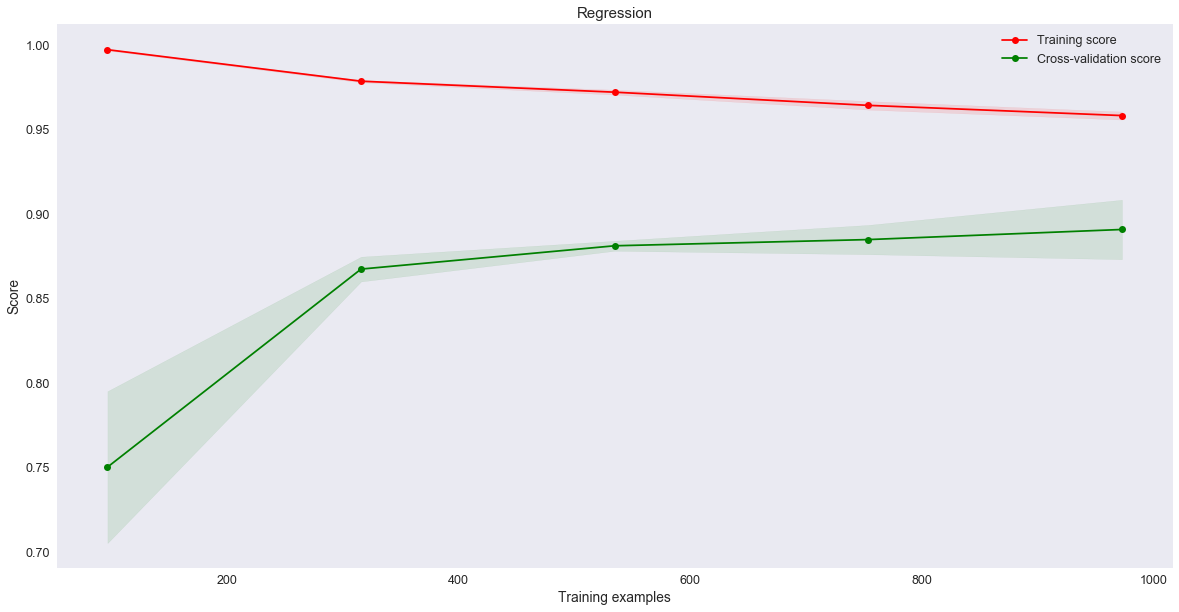

In [45]:
plot_learning_curve()

### Validation curve: find best hyper-param range

In [47]:
def plot_validation_curve(model, param_name, param_range):
    train_scores, test_scores = validation_curve(
    model, X, Y, param_name=param_name, param_range=param_range,
    cv=10, scoring="r2", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Regression")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    #plt.semilogx(param_range, train_scores_mean, label="Training score",
    #             color="darkorange", lw=lw)
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    #plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
    #             color="navy", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

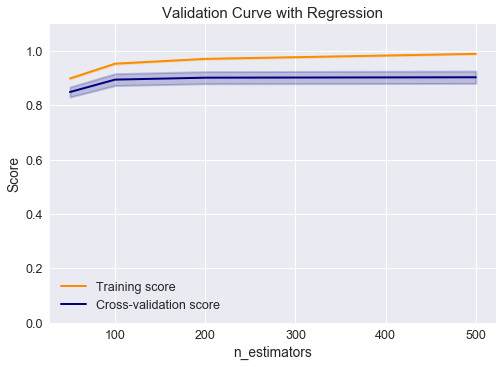

In [48]:
param_name = 'n_estimators'
param_range = [50, 100, 200, 500]
plot_validation_curve(model, param_name, param_range)

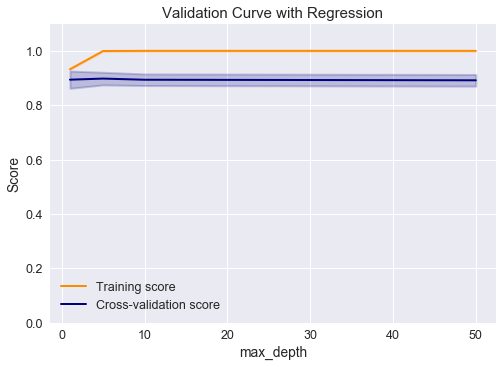

In [49]:
param_name = 'max_depth'
param_range = [1,5,10,50]
plot_validation_curve(model, param_name, param_range)

### Find the best hyperparam for model using GridSearchCV

In [51]:
#param_grid = { "n_estimators"      : [250, 300, 500], 
#           "max_depth"         : [10, 20]}
param_grid = { "n_estimators"      : [50, 100, 200, 500],
              "max_depth"         : [1,5,10,50]
             }
grid_search = GridSearchCV(model, param_grid, n_jobs=1, cv=2)
grid_search.fit(X, Y)
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 500}


### Split train data into X/Y train + X/Y test

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=1000, random_state=324)
print("train size:", len(X_train))
print("test size:", len(X_test))
print("Split ratio", len(X_test)/len(X_train))

train size: 1000
test size: 460
Split ratio 0.46


### Use model esemble to boost result

In [54]:
model_boost = AdaBoostRegressor(base_estimator=model, n_estimators=200, random_state=200)

### Fit a model to the training set 

In [55]:
model_boost.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=500, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
         learning_rate=1.0, loss='linear', n_estimators=200,
         random_state=200)

### Perform Prediction for train set

In [56]:
Y_prediction = model_boost.predict(X_test)
Y_prediction[:5]

array([ 11.33650017,  12.10027409,  12.00646973,  11.73374653,  12.43725681], dtype=float32)

### Evaluate model Accuracy using Root Mean Square Error

In [57]:
RMSE1 = sqrt(mean_squared_error(y_true = Y_test, y_pred = Y_prediction))
print("RMSE1:", RMSE1)

RMSE1: 0.1393416980192426


### Plot prediction

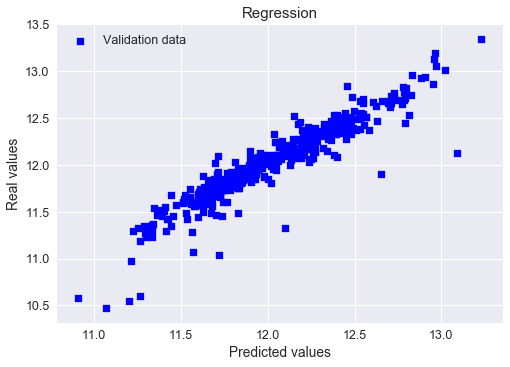

In [58]:
plt.scatter(Y_prediction, Y_test, c = "b", marker = "s", label = "Validation data")
plt.title("Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.show()

# Predict and Submit for Evaluation data set

In [59]:
X_eval = eval_set
Y_eval_log = model_boost.predict(X_eval)
# Transform SalePrice to normal
Y_eval = np.exp(Y_eval_log.ravel())
print(Y_eval[:5])

[ 123476.765625  159527.703125  180255.5625    189327.875     190387.09375 ]


In [60]:
#eval_set.index
eval_output = pd.DataFrame({'Id': eval_data_id, 'SalePrice': Y_eval})
print(len(eval_output))
eval_output.head()

1459


,Id,SalePrice
0,1461,123476.765625
1,1462,159527.703125
2,1463,180255.562500
3,1464,189327.875000
4,1465,190387.093750


### Save prediction to CSV

In [61]:
today = str(datetime.date.today())
print(today)
eval_output.to_csv(DATA_DIR +'/' +today+'-submission.csv',index=False)

2017-06-26


### Final result: 2017-07-26 (all features)
- RandomForest
- Your submission scored 0.15463, which is an improvement ofyour previous score of 0.18198. Great job!
- Rank: 1454

### Final result: 2017-07-26, 15:30 (added AdaBoost)
- RandomForest
- Your submission scored 0.14865, which is an improvement ofyour previous score of 0.15463. Great job!
- Rank: 1357

### Final result: 2017-07-26, 15:53 (added AdaBoost)
- RandomForest
- Your submission scored 0.14845, which is an improvement ofyour previous score of 0.14865. Great job!
- Rank: 1353

### Final result: 2017-07-26, 16:30
- XGBoost
- Your submission scored 0.13484, which is an improvement ofyour previous score of 0.14845. Great job!
- Rank: 1044